# Busqueda por Profundidad

A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad


In [3]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [5]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


# Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.


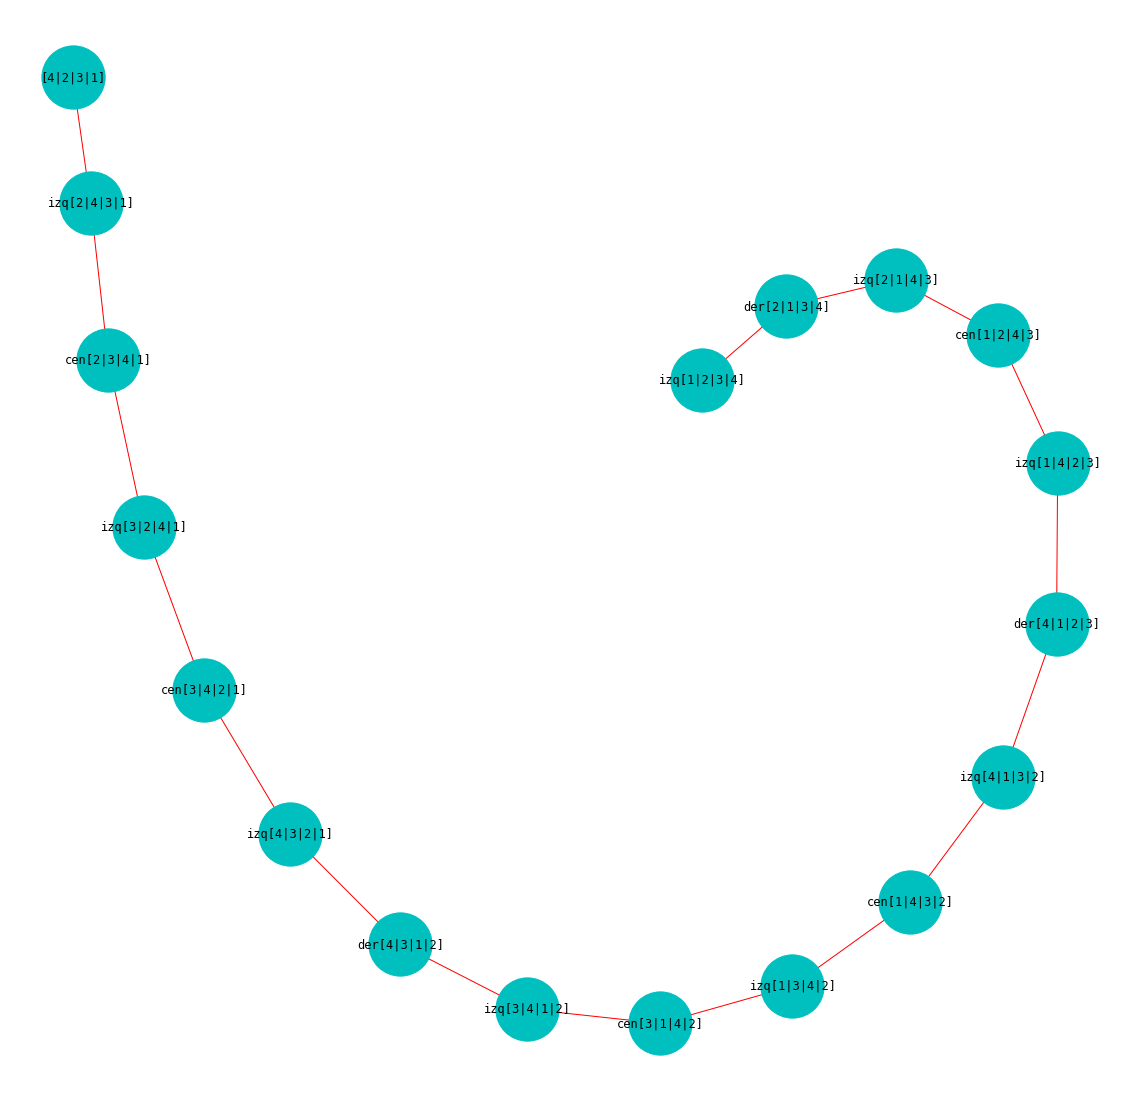

In [44]:
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
   
gf = nx.Graph()
gf.add_edge("[4|2|3|1]","izq[2|4|3|1]")
gf.add_edge("izq[2|4|3|1]","cen[2|3|4|1]")
gf.add_edge("cen[2|3|4|1]","izq[3|2|4|1]")
gf.add_edge("izq[3|2|4|1]","cen[3|4|2|1]")
gf.add_edge("cen[3|4|2|1]","izq[4|3|2|1]")
gf.add_edge("izq[4|3|2|1]","der[4|3|1|2]")
gf.add_edge("der[4|3|1|2]","izq[3|4|1|2]")
gf.add_edge("izq[3|4|1|2]","cen[3|1|4|2]")
gf.add_edge("cen[3|1|4|2]","izq[1|3|4|2]")
gf.add_edge("izq[1|3|4|2]","cen[1|4|3|2]")
gf.add_edge("cen[1|4|3|2]","izq[4|1|3|2]")
gf.add_edge("izq[4|1|3|2]","der[4|1|2|3]")
gf.add_edge("der[4|1|2|3]","izq[1|4|2|3]")
gf.add_edge("izq[1|4|2|3]","cen[1|2|4|3]")
gf.add_edge("cen[1|2|4|3]","izq[2|1|4|3]")
gf.add_edge("izq[2|1|4|3]","der[2|1|3|4]")
gf.add_edge("der[2|1|3|4]","izq[1|2|3|4]")

plt.figure(4,figsize=(20,20)) 
pos =nx.spring_layout(gf)
nx.draw_networkx_nodes(gf, pos, node_size=4000, node_color='c')
nx.draw_networkx_edges(gf, pos, edge_color='red') 
nx.draw_networkx_labels(gf, pos, font_family='monospace',edge_color="red",font_size=12,width=4,with_labels=True) 
plt.axis('off')
plt.show()

## Centro Educativos
Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


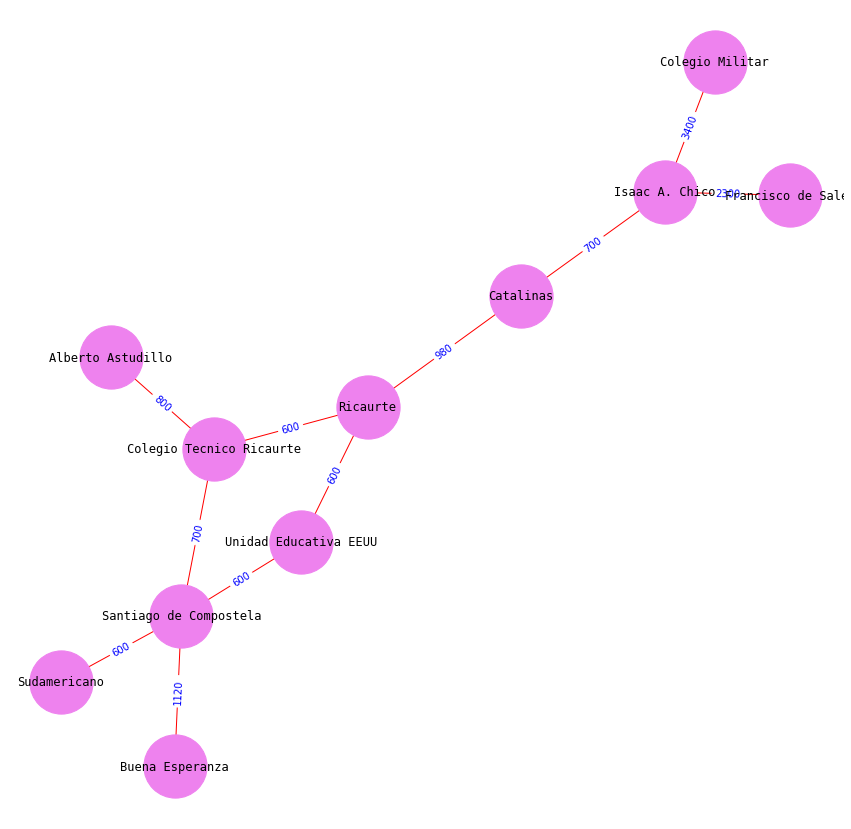

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
   
gf = nx.Graph()
gf.add_edge("Ricaurte","Unidad Educativa EEUU", label = '600')
gf.add_edge("Ricaurte","Colegio Tecnico Ricaurte", label = '600')
gf.add_edge("Ricaurte","Catalinas", label = '980')
gf.add_edge("Unidad Educativa EEUU","Ricaurte", label = '600')
gf.add_edge("Unidad Educativa EEUU","Santiago de Compostela", label = '600')
gf.add_edge("Colegio Tecnico Ricaurte","Ricaurte", label = '600')
gf.add_edge("Colegio Tecnico Ricaurte","Alberto Astudillo", label = '800')
gf.add_edge("Colegio Tecnico Ricaurte","Santiago de Compostela", label = '700')
gf.add_edge("Catalinas","Ricaurte", label = '980')
gf.add_edge("Catalinas","Isaac A. Chico", label = '700')
gf.add_edge("Santiago de Compostela","Unidad Educativa EEUU", label = '600')
gf.add_edge("Santiago de Compostela","Sudamericano", label = '600')
gf.add_edge("Santiago de Compostela","Buena Esperanza", label = '1120')
gf.add_edge("Alberto Astudillo","Colegio Tecnico Ricaurte", label = '800')
gf.add_edge("Isaac A. Chico","Catalinas", label = '700')
gf.add_edge("Isaac A. Chico","Francisco de Sales", label = '2300')
gf.add_edge("Isaac A. Chico","Colegio Militar", label = '3400')
gf.add_edge("Sudamericano","Santiago de Compostela", label = '600')
gf.add_edge("Colegio Militar","Isaac A. Chico", label = '3400')
gf.add_edge("Francisco de Sales","Isaac A. Chico", label = '2300')
gf.add_edge("Buena Esperanza","Santiago de Compostela", label = '1120')


plt.figure(2,figsize=(15,15)) 
pos =nx.spring_layout(gf)
nx.draw_networkx_nodes(gf, pos, node_size=4000, node_color='violet')
nx.draw_networkx_edges(gf, pos, edge_color='red') 
nx.draw_networkx_edge_labels(gf,pos,edge_labels={(u,v):gf[u][v]['label'] for u,v in gf.edges()} ,font_color='Blue')
nx.draw_networkx_labels(gf, pos, font_family='monospace',edge_color="red",font_size=12,width=4,with_labels=True) 
plt.axis('off')
plt.show()



## 4 Reinas

Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.


Subir el cuaderno con la resolucion.

In [20]:
sol=[0,0,0,0]
fila=0
def CuatroReinas(sol,fila,n):
    if fila>=n:
        return False

    enc = False

    while True:
            if (sol[fila] < n):
                sol[fila] = sol[fila] + 1
            
            if (Validar(sol,fila)):
                
                if fila != n-1:
                    enc = CuatroReinas(sol, fila+1,n)
                    if enc==False:
                        sol[fila+1] = 0
                else:
                    print(sol)
                    enc = True
            if (sol[fila]==n or enc==True):
                break
    return enc

def Validar(sol,fila):
    for i in range(fila):
        if (sol[i]==sol[fila]) or (abs(fila-i)== abs(sol[fila]-sol[i])):
            return False
    return True

print(CuatroReinas(sol,fila,4))

[2, 4, 1, 3]
True


# Conclusiones

En la búsqueda de profundidad se debe recorrer el árbol desde la parte superior a la inferior, este método consiste en ir expandiendo los nodos que va localizando de forma recurrente en un camino concreto, en caso de qu eya no queden más nodos que visitar en dicho camino y no se encuentre la solución, se debe regresar y repetir el mismo proceso con los nodos hermanos hasta encontrar el estado objetivo.